In [ ]:
%run C:\Users\Omar\Intern_Final_Project\notebooks\Data_Cleaning\Features_Engineering.ipynb

### *cross validation*

*We will keep the last 16 rows of the dataset and do a Rolling Moving Origin of step size of 4*


*lets explain this visually*

In [3]:
from sklearn.model_selection import TimeSeriesSplit

In [18]:
test_data_red=df_red[-16:]
#####
X = test_data_red.drop("price",axis=1)
y = test_data_red["price"]
date=test_data_red.reset_index()["week_end_dt"]
tscv = TimeSeriesSplit(n_splits=3,max_train_size=16,test_size=4,gap=0)
for i, (train_index, test_index) in enumerate(tscv.split(X)):
     print(f"Fold {i}:")
     print(f"  Train: index={train_index}")
     print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[0 1 2 3]
  Test:  index=[4 5 6 7]
Fold 1:
  Train: index=[0 1 2 3 4 5 6 7]
  Test:  index=[ 8  9 10 11]
Fold 2:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11]
  Test:  index=[12 13 14 15]


The above code out come expresess how the cross validation works ,
1st fold : we consider the 4 intial points as train data and the next 4 points as test data
2ns fold : the test points from the prevuoys fold we be appened to the new train points asnd new points ahead are test points
3rd fold : works as metioned above

The below chart is ease the process:


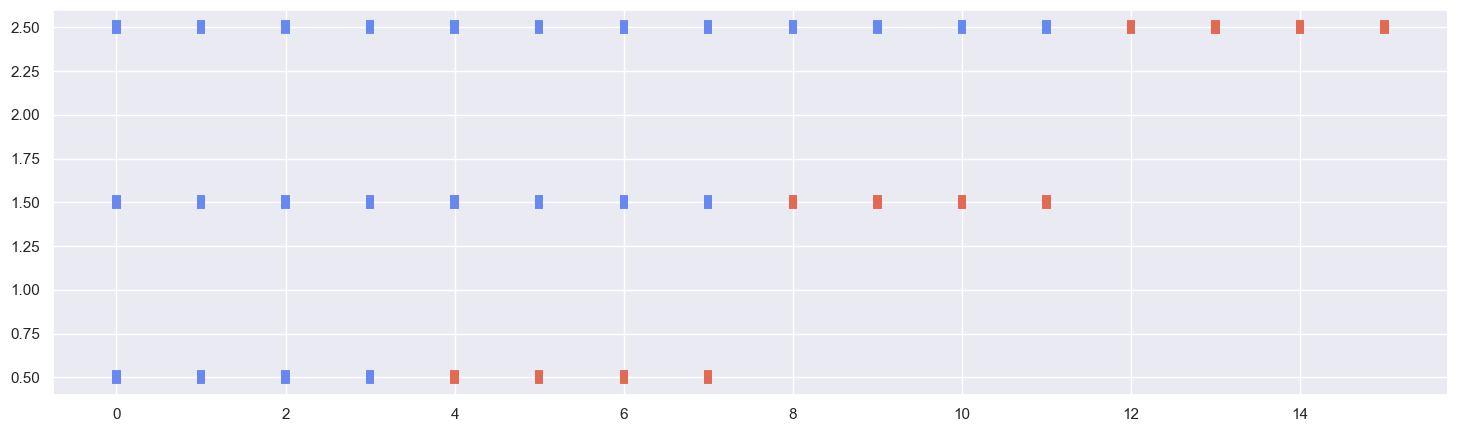

In [19]:
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, n_splits, X, y):
    fig, ax = plt.subplots(1, 1, figsize = (18, 5))
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=10, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)
        
plot_cv_indices(cv=tscv,n_splits=3,X=X,y=y)

---
importing needed libraries

In [20]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import plot_tree,plot_importance,XGBRegressor,XGBRFRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from lightgbm.sklearn import LGBMRegressor
import warnings                                  
warnings.filterwarnings('ignore')

In [ ]:
tscv = TimeSeriesSplit(n_splits=3,max_train_size=16,test_size=4,gap=0)

In [25]:
mape_scores = []
models_names=["DecisionTreeRegressor","RandomForestRegressor","SVR()","LinearRegression","XGBRegressor_boo",
                    "XGBRFRegressor_boo","AdaBoostRegressor_boo","LGBMRegressor_boo","CatBoostRegressor_boo"]
              
models=[DecisionTreeRegressor(random_state=0),RandomForestRegressor(random_state=0),SVR(),LinearRegression(),XGBRegressor(random_state=0),
                XGBRFRegressor(random_state=0),AdaBoostRegressor(random_state=0),LGBMRegressor(force_row_wise=True),CatBoostRegressor()]

      
time_series_data_red = test_data_red.values

for train_index, test_index in tscv.split(time_series_data_red):
              X_train, y_train = time_series_data_red[train_index, 1:], time_series_data_red[train_index, 0]
              X_test, y_test = time_series_data_red[test_index, 1:], time_series_data_red[test_index, 0]
        
for model in models:
              model.fit(X_train, y_train)
              y_pred_red = model.predict(X_test)

              mape = np.mean(mean_absolute_percentage_error(y_test, y_pred_red))
              mape_scores.append(mape)


              red_results=pd.concat([pd.DataFrame(models_names,columns=["models_names"]),pd.DataFrame(mape_scores,columns=["mape_scores"])],axis=1)
              


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 12, number of used features: 0
[LightGBM] [Info] Start training from score 8.050651
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

In [22]:
test_data_green=df_green[-16:]
test_data_yellow=df_yellow[-16:]


In [27]:
mape_scores = []


models_names=["DecisionTreeRegressor","RandomForestRegressor","SVR()","LinearRegression","XGBRegressor_boo",
                    "XGBRFRegressor_boo","AdaBoostRegressor_boo","LGBMRegressor_boo","CatBoostRegressor_boo"]
              


models=[DecisionTreeRegressor(random_state=0),RandomForestRegressor(random_state=0),SVR(),LinearRegression(),XGBRegressor(random_state=0),
                XGBRFRegressor(random_state=0),AdaBoostRegressor(random_state=0),LGBMRegressor(force_row_wise=True),CatBoostRegressor()]

      

time_series_data_green = test_data_green.values


for train_index, test_index in tscv.split(time_series_data_green):
              X_train, y_train = time_series_data_green[train_index, 1:], time_series_data_green[train_index, 0]
              X_test, y_test = time_series_data_green[test_index, 1:], time_series_data_green[test_index, 0]
        
        


for model in models:
              model.fit(X_train, y_train)
              y_pred_green = model.predict(X_test)

              mape = np.mean(mean_absolute_percentage_error(y_test, y_pred_green))
              mape_scores.append(mape)

              green_results=pd.concat([pd.DataFrame(models_names,columns=["models_names"]),pd.DataFrame(mape_scores,columns=["mape_scores"])],axis=1)





[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 12, number of used features: 0
[LightGBM] [Info] Start training from score 7.372297
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

In [30]:
tscv = TimeSeriesSplit(n_splits=3,max_train_size=16,test_size=4,gap=0)

mape_scores = []
y_pred_yellow_results=[]


models_names=["DecisionTreeRegressor","RandomForestRegressor","SVR()","LinearRegression","XGBRegressor_boo",
                  "XGBRFRegressor_boo","AdaBoostRegressor_boo","LGBMRegressor_boo","CatBoostRegressor_boo"]
              


models=[DecisionTreeRegressor(random_state=0),RandomForestRegressor(random_state=0),SVR(),LinearRegression(),XGBRegressor(random_state=0),
            XGBRFRegressor(random_state=0),AdaBoostRegressor(random_state=0),LGBMRegressor(force_row_wise=True),CatBoostRegressor()]

      

time_series_data_yellow = test_data_yellow.values


for train_index, test_index in tscv.split(time_series_data_yellow):
              X_train, y_train = time_series_data_yellow[train_index, 1:], time_series_data_yellow[train_index, 0]
              X_test, y_test = time_series_data_yellow[test_index, 1:], time_series_data_yellow[test_index, 0]
        


for model in models:
              model.fit(X_train, y_train)
              y_pred_yellow = model.predict(X_test)
              y_pred_yellow_results.append(y_pred_yellow)



              mape = np.mean(mean_absolute_percentage_error(y_test, y_pred_yellow))
              mape_scores.append(mape)

              yellow_results=pd.concat([pd.DataFrame(models_names,columns=["models_names"]),pd.DataFrame(mape_scores,columns=["mape_scores"])],axis=1)

        
       

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 12, number of used features: 0
[LightGBM] [Info] Start training from score 10.711343
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

In [26]:
red_results.sort_values(by="mape_scores")

,models_names,mape_scores
5,XGBRFRegressor_boo,0.032385
4,XGBRegressor_boo,0.037500
1,RandomForestRegressor,0.045146
0,DecisionTreeRegressor,0.046297
6,AdaBoostRegressor_boo,0.054156
8,CatBoostRegressor_boo,0.067109
3,LinearRegression,0.093043
2,SVR(),0.098563
7,LGBMRegressor_boo,0.147098


In [28]:
green_results.sort_values(by="mape_scores")

,models_names,mape_scores
6,AdaBoostRegressor_boo,0.011218
5,XGBRFRegressor_boo,0.012867
1,RandomForestRegressor,0.015844
8,CatBoostRegressor_boo,0.022009
0,DecisionTreeRegressor,0.028126
4,XGBRegressor_boo,0.029396
2,SVR(),0.056621
3,LinearRegression,0.083073
7,LGBMRegressor_boo,0.092160


In [31]:
yellow_results.sort_values(by="mape_scores")

,models_names,mape_scores
0,DecisionTreeRegressor,0.061649
6,AdaBoostRegressor_boo,0.061649
4,XGBRegressor_boo,0.062834
5,XGBRFRegressor_boo,0.069128
1,RandomForestRegressor,0.090017
8,CatBoostRegressor_boo,0.122776
7,LGBMRegressor_boo,0.205554
2,SVR(),0.210404
3,LinearRegression,0.523317
